In [1]:
import pandas as pd
from PIL import Image
import numpy as np
import os
from tqdm import tqdm
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torchvision import transforms as T
import cv2

In [ ]:
data = pd.read_csv('data/train.csv')

In [2]:
def decode(coded, imshape):
    shape = imshape[0] * imshape[1]
    mask = np.asarray(coded.split(), dtype=int)
    st = mask[::2]
    le = mask[1::2]
    ends = st + le  
    imas = np.zeros(shape, dtype=int)
    for low, high in zip(st, ends):
        imas[low:high] = 1
    return imas.reshape(imshape)

In [ ]:
new_df = pd.DataFrame(columns=['case', 'day', 'slice', 'class', 'width', 'height', 'seg',  'path'])
for d, row in data.iterrows():
    sample = row['id'].split('_')
    folder_path = f'data/train/{sample[0]}/{sample[0]}_{sample[1]}/scans/'
    naps = os.listdir(folder_path)
    naps = ''.join([i for i in naps if sample[-1] in i])
    image_path = folder_path + naps
    w, h = naps.split('_')[2], naps.split('_')[3]
    new_df.loc[d] = {'path' : image_path, 'class': row['class'], 
                      'seg': row['segmentation'], 'case':sample[0], 'day':sample[1], 'slice':sample[-1],
                    'width': w, 'height': h}

In [ ]:
new_df.to_csv('data.csv', index=False)

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head(10)

,case,day,slice,class,width,height,seg,path
0,case123,day20,1,large_bowel,266,266,NaN,data/train/case123/case123_day20/scans/slice_0...
1,case123,day20,1,small_bowel,266,266,NaN,data/train/case123/case123_day20/scans/slice_0...
2,case123,day20,1,stomach,266,266,NaN,data/train/case123/case123_day20/scans/slice_0...
3,case123,day20,2,large_bowel,266,266,NaN,data/train/case123/case123_day20/scans/slice_0...
4,case123,day20,2,small_bowel,266,266,NaN,data/train/case123/case123_day20/scans/slice_0...
5,case123,day20,2,stomach,266,266,NaN,data/train/case123/case123_day20/scans/slice_0...
6,case123,day20,3,large_bowel,266,266,NaN,data/train/case123/case123_day20/scans/slice_0...
7,case123,day20,3,small_bowel,266,266,NaN,data/train/case123/case123_day20/scans/slice_0...
8,case123,day20,3,stomach,266,266,NaN,data/train/case123/case123_day20/scans/slice_0...
9,case123,day20,4,large_bowel,266,266,NaN,data/train/case123/case123_day20/scans/slice_0...


In [5]:
df.tail(10)

,case,day,slice,class,width,height,seg,path
115478,case30,day0,141,stomach,266,266,NaN,data/train/case30/case30_day0/scans/slice_0141...
115479,case30,day0,142,large_bowel,266,266,NaN,data/train/case30/case30_day0/scans/slice_0142...
115480,case30,day0,142,small_bowel,266,266,NaN,data/train/case30/case30_day0/scans/slice_0142...
115481,case30,day0,142,stomach,266,266,NaN,data/train/case30/case30_day0/scans/slice_0142...
115482,case30,day0,143,large_bowel,266,266,NaN,data/train/case30/case30_day0/scans/slice_0143...
115483,case30,day0,143,small_bowel,266,266,NaN,data/train/case30/case30_day0/scans/slice_0143...
115484,case30,day0,143,stomach,266,266,NaN,data/train/case30/case30_day0/scans/slice_0143...
115485,case30,day0,144,large_bowel,266,266,NaN,data/train/case30/case30_day0/scans/slice_0144...
115486,case30,day0,144,small_bowel,266,266,NaN,data/train/case30/case30_day0/scans/slice_0144...
115487,case30,day0,144,stomach,266,266,NaN,data/train/case30/case30_day0/scans/slice_0144...


In [6]:
def get_diffrents(df):
    get_vals = list()
    for i in range(0, len(df), 3):
        bakt = df.iloc[i:i+3].dropna().values
        if bakt.shape[0] is not 0:
            get_vals.append(bakt)
        _3 = [i for i in get_vals if i.shape[0]==3]
        _2 = [i for i in get_vals if i.shape[0]==2]
        _1 = [i for i in get_vals if i.shape[0]==1]
    return _1, _2, _3

<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_3944/550848026.py:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if bakt.shape[0] is not 0:


In [7]:
_1, _2, _3 = get_diffrents(df)

In [105]:
from matplotlib.patches import Patch



In [201]:
def visualize(image_and_info):
    image = plt.imread(image_and_info[0][-1])
    combined_image = np.zeros((image.shape[0], image.shape[1], 3))
    masks = dict()
    colors = {
        0: [1, 0, 0],
        1: [0, 1, 0],
        2: [0, 0, 1],
        3: [0, 0, 0]
    }
    legend_elements = list()
    for i in range(image_and_info.shape[0]):
        masks[i] = decode(image_and_info[i][6], image.shape)
        combined_image[masks[i] == 1] = colors[i]
        legend_elements.append(Patch(facecolor=colors[i], edgecolor='k', label=image_and_info[i][3]))

    fig = plt.figure(figsize=(15, 4))
    # raw image
    plt.subplot(1, 3, 1)
    plt.title('Raw Image')
    plt.imshow(image)
    plt.axis("off")
    
    #  Just Tumors
    plt.subplot(1, 3, 2)
    plt.title('Tumor Image')

    plt.imshow(combined_image)
    plt.axis("off")
    
    # Masked
    plt.subplot(1, 3, 3)
    plt.title('Masked Image')
    plt.imshow(image)
    plt.legend(handles=legend_elements, loc='lower right')
    plt.imshow(combined_image, alpha=0.5)
    

In [202]:
import random

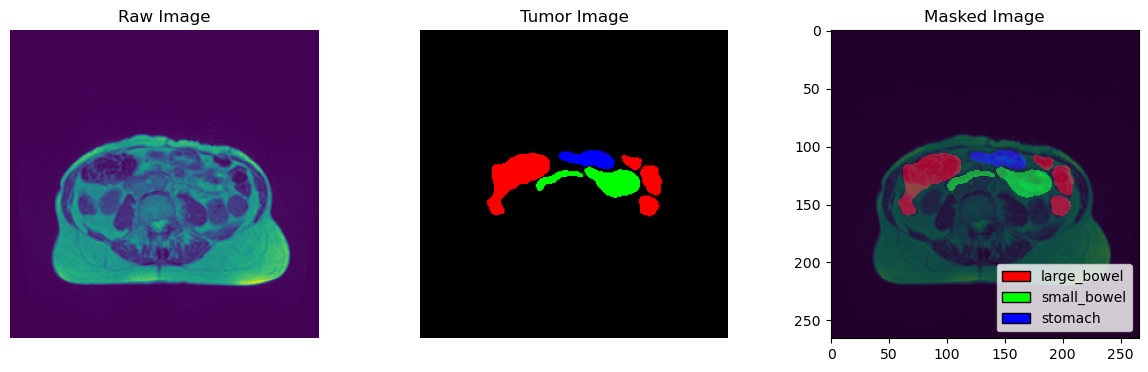

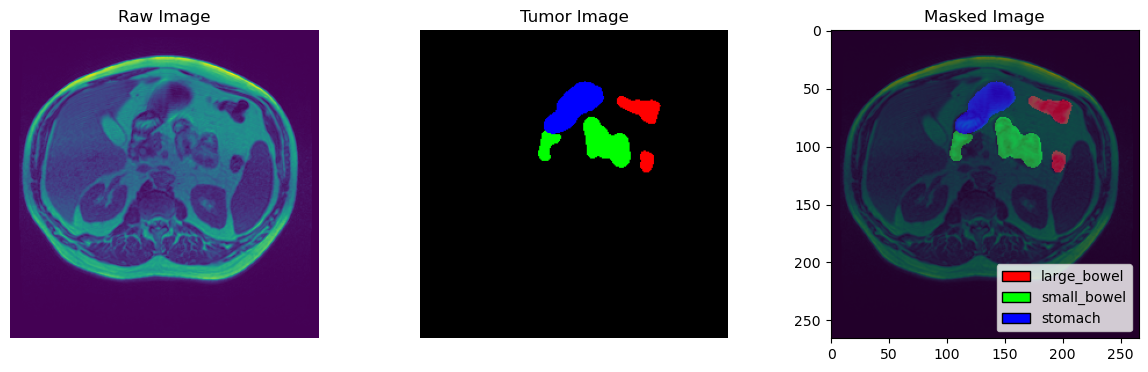

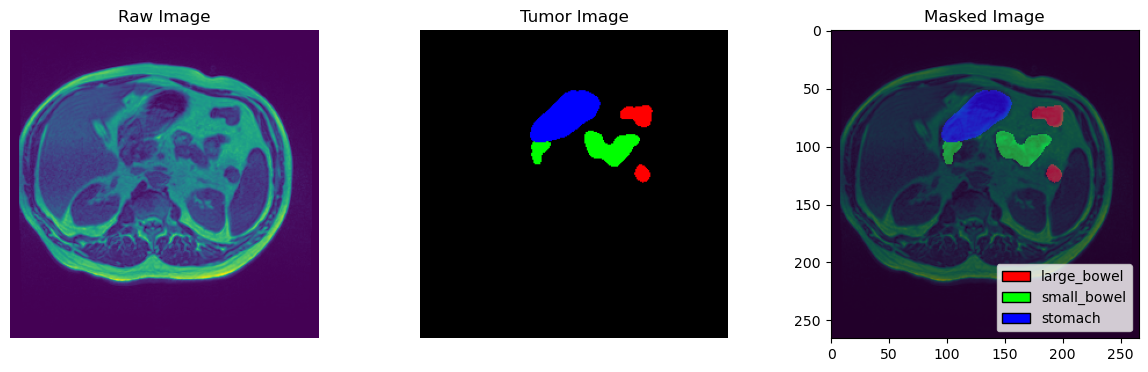

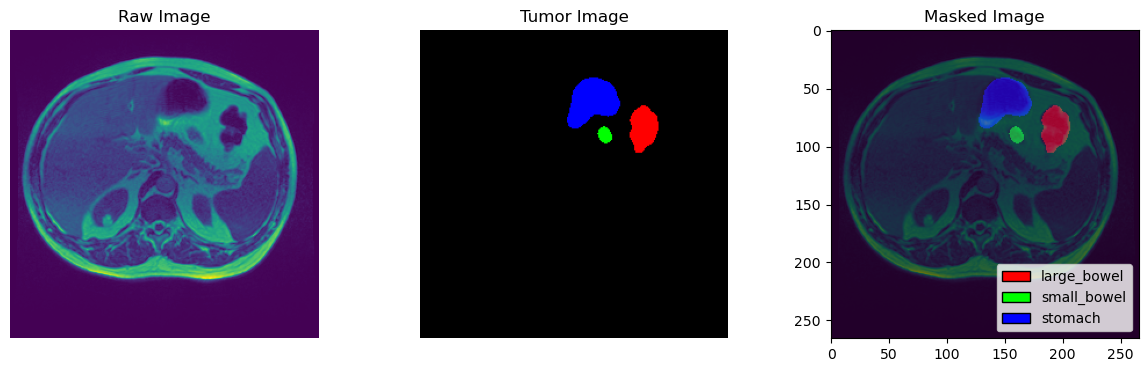

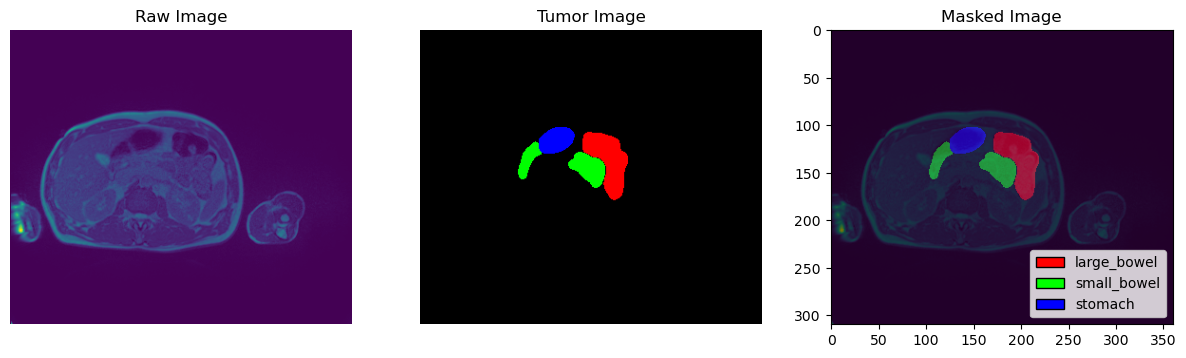

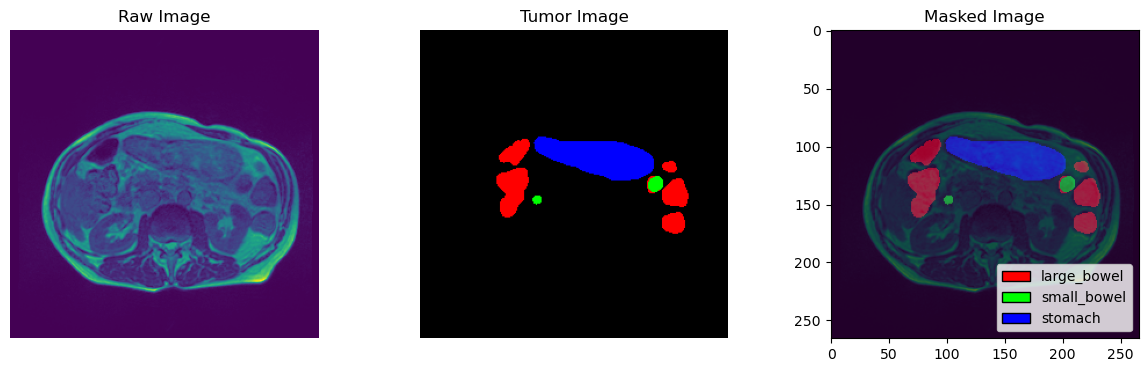

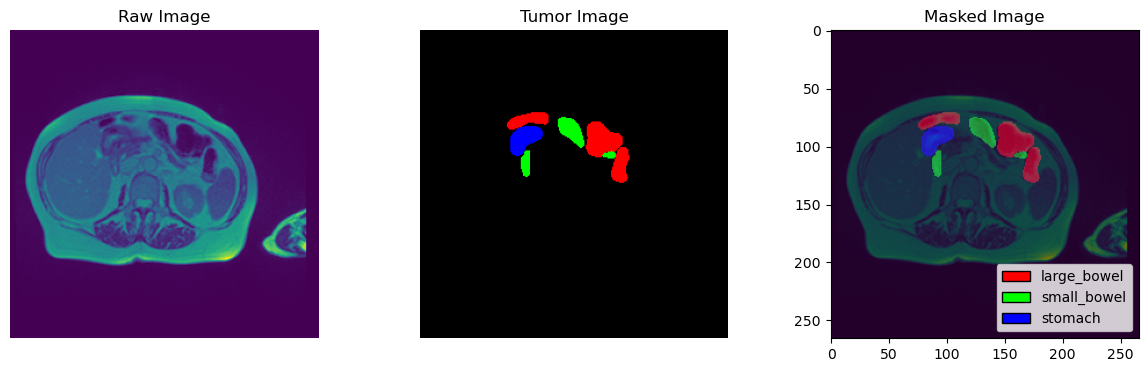

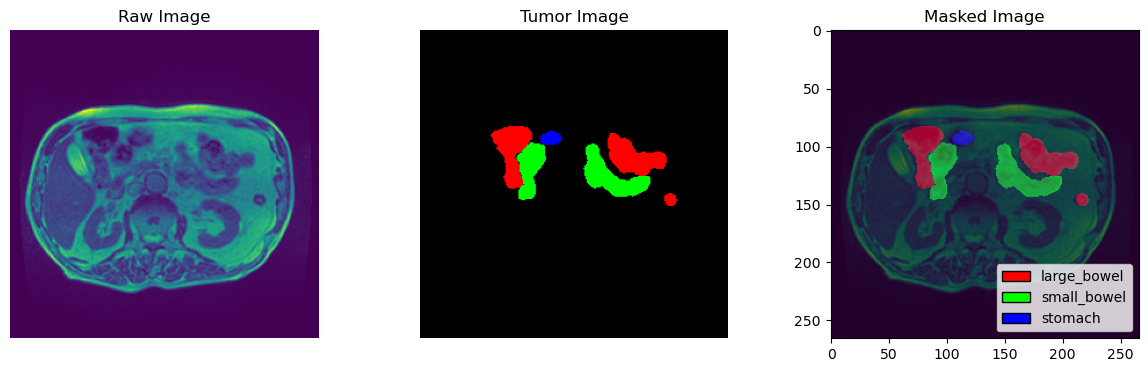

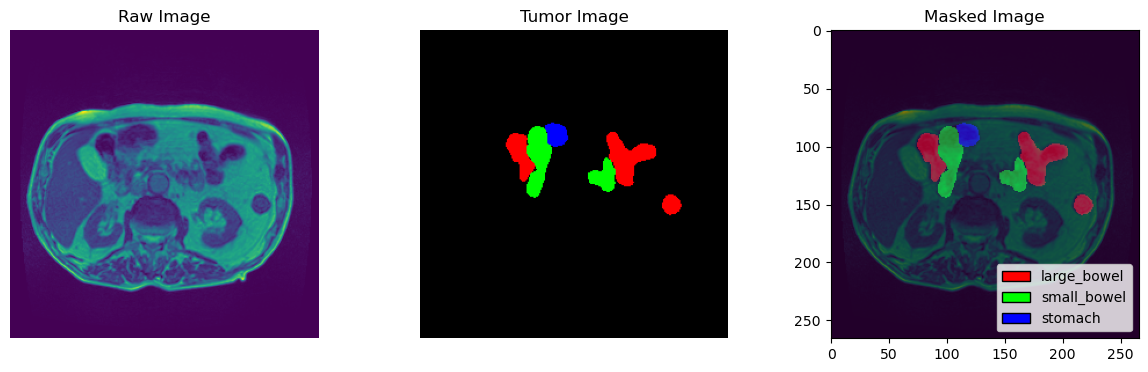

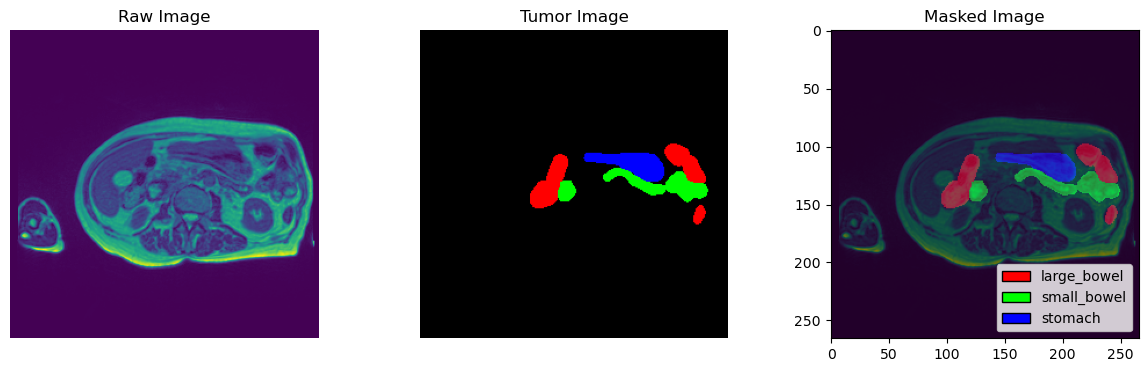

In [204]:
for i in range(10):
    visualize(_3[random.randint(0, 1000)])